In [2]:
from __future__ import print_function

import math
import numpy as np

import nsfg
import thinkstats2
import thinkplot

In [3]:
# Read in file and take out all values that didn't result in a live birth
preg = nsfg.ReadFemPreg()
live = preg[preg.outcome ==1]

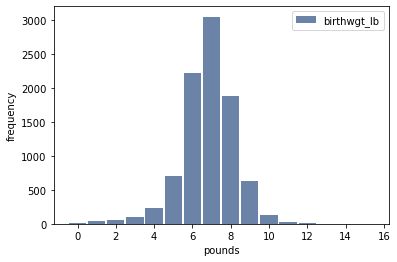

<Figure size 576x432 with 0 Axes>

In [4]:
# Mean birthweight for all live births
hist = thinkstats2.Hist(live.birthwgt_lb, label='birthwgt_lb')
thinkplot.Hist(hist)
thinkplot.Show(xlabel='pounds', ylabel='frequency')

In [5]:
# Split data into 2 groups by birth order and compute their hist objects
firsts = live[live.birthord == 1]
others = live[live.birthord != 1]

first_hist = thinkstats2.Hist(firsts.totalwgt_lb)
other_hist = thinkstats2.Hist(others.totalwgt_lb)

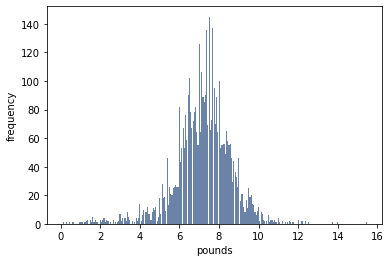

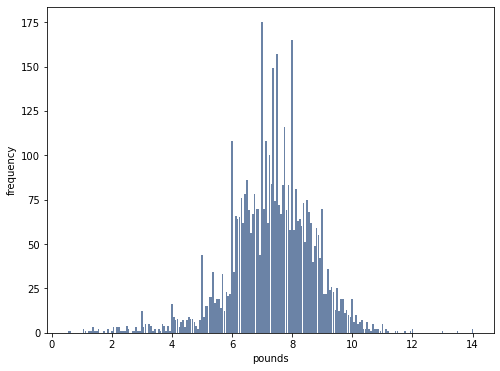

<Figure size 576x432 with 0 Axes>

In [6]:
# Plot histograms and compare
thinkplot.Hist(first_hist)
thinkplot.Show(xlabel='pounds', ylabel='frequency')
thinkplot.Hist(other_hist)
thinkplot.Show(xlabel='pounds', ylabel='frequency')


In [7]:
# Calculate descriptive statistics for all, first, and other births
mean = live.totalwgt_lb.mean()
std = live.totalwgt_lb.std()

mean_firsts = firsts.totalwgt_lb.mean()
varfirsts = firsts.totalwgt_lb.var()
stdfirsts = firsts.totalwgt_lb.std()

mean_others = others.totalwgt_lb.mean()
var_others = others.totalwgt_lb.var()
std_others = others.totalwgt_lb.std()

print("mean weight of all births = ", mean)
print("mean weight of first born = ", mean_firsts)
print("mean weight of others born = ", mean_others)

print("Standard deviation for all birth weights = ", std)

mean weight of all births =  7.265628457623368
mean weight of first born =  7.201094430437772
mean weight of others born =  7.325855614973262
Standard deviation for all birth weights =  1.4082934455690168


In [11]:
# Define function to compute Cohen's d to quantify the difference between groups
def CohenEffectSize(group1, group2):
    diff = group1.mean() - group2.mean()
    
    var1 = group1.var()
    var2 = group2.var()
    n1, n2 = len(group1), len(group2)
    
    pooled_var = (n1 * var1 + n2 * var2) / (n1 + n2)
    d = diff / np.sqrt(pooled_var)
    return d

# Call the function and view results
print(CohenEffectSize(firsts, others))

caseid         0.033072
pregordr      -1.631418
howpreg_n           NaN
howpreg_p           NaN
moscurrp            NaN
                 ...   
finalwgt      -0.055088
secu_p        -0.010242
sest           0.025330
cmintvw             NaN
totalwgt_lb   -0.088673
Length: 244, dtype: float64


In [ ]:
'''To investigate whether first babies are lighter or heavier than others, first I viewed the histograms
of those two groups and nothing particular stood out. Then, I used descriptive statistics to view the means for
all birthweights (7.26 lbs), first birthweights(7.2 lbs), and other birthweights(7.35 obs). According to 
the means, others births tend to be a bit heavier, a difference of 0.125 lbs, which comes out to 2 ounces. 
But when you look at the fact that the average birth weight was 116.25 ounces, 2 ounces only comes out to 
be 0.017% difference, which is not a significant find. Lastly, I calculated cohens d using the two groups. 
The result was 0.088, which is a small effect. 

In conclusion: There were no significant finding to suggest that first babies are either lighter or heavier than 
other babies. '''